In [29]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import json

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

import optuna

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc,matthews_corrcoef, precision_recall_curve,roc_auc_score




In [30]:
with open("optim_param/optim_DNN_1_params.json", "r") as f:
    DNN_1_params = json.load(f)

with open("optim_param/optim_DNN_2_params.json", "r") as f:
    DNN_2_params = json.load(f)

with open("optim_param/optim_DNN_3_params.json", "r") as f:
    DNN_3_params = json.load(f)

with open("optim_param/optim_DNN_4_params.json", "r") as f:
    DNN_4_params = json.load(f)

with open("optim_param/optim_DNN_5_params.json", "r") as f:
    DNN_5_params = json.load(f)

with open("optim_param/optim_DNN_6_params.json", "r") as f:
    DNN_6_params = json.load(f)

with open("optim_param/optim_DNN_7_params.json", "r") as f:
    DNN_7_params = json.load(f)

with open("optim_param/optim_ResNet_params.json", "r") as f:
    ResNet_params = json.load(f)

with open("optim_param/optim_FTTansformer_params.json", "r") as f:
    FTTransformer_params = json.load(f)

In [ ]:
class DNN_1(nn.Module):
    def __init__(self, input_dim, dropout_rate=DNN_1_params["dropout"]):
        super(DNN_1, self).__init__()
        self.layer1 = nn.Linear(input_dim, 32)
        self.bn1 = nn.BatchNorm1d(32)
        self.layer2 = nn.Linear(32, 16)
        self.bn2 = nn.BatchNorm1d(16)
        self.layer3 = nn.Linear(16, 8)
        self.bn3 = nn.BatchNorm1d(8)
        self.layer4 = nn.Linear(8, 4)
        self.bn4 = nn.BatchNorm1d(4)
        self.output_layer = nn.Linear(4, 1)

        self.dropout = nn.Dropout(dropout_rate)
        
    def forward(self, x):
        x = torch.relu(self.bn1(self.layer1(x)))  
        x = self.dropout(x)
        
        x = torch.relu(self.bn2(self.layer2(x)))  
        x = self.dropout(x)

        x = torch.relu(self.bn3(self.layer3(x)))  
        x = self.dropout(x)

        x = torch.relu(self.bn4(self.layer4(x))) 
        x = self.dropout(x)

        x = torch.sigmoid(self.output_layer(x)) 
        return x

In [ ]:
class DNN_2(nn.Module):
    def __init__(self, input_dim,dropout1=DNN_2_params["dropout1"],dropout2=DNN_2_params["dropout2"],dropout3=DNN_2_params["dropout3"],dropout4=DNN_2_params["dropout4"]):
        super(DNN_2, self).__init__()
        self.layer1 = nn.Linear(input_dim,32)
        self.layer2 = nn.Linear(32,16)
        self.layer3 = nn.Linear(16,8)
        self.layer4 = nn.Linear(8,4)
        self.output_layer = nn.Linear(4, 1)

        self.bn1=nn.BatchNorm1d(32)
        self.bn2=nn.BatchNorm1d(16)
        self.bn3=nn.BatchNorm1d(8)
        self.bn4=nn.BatchNorm1d(4)


        self.dropout1 = nn.Dropout(dropout1)
        self.dropout2 = nn.Dropout(dropout2)
        self.dropout3 = nn.Dropout(dropout3)
        self.dropout4 = nn.Dropout(dropout4)

        
        
    def forward(self, x):
        x = torch.relu(self.bn1(self.layer1(x)))
        x = self.dropout1(x)
        
        x = torch.relu(self.bn2(self.layer2(x)))
        x = self.dropout2(x)

        x = torch.relu(self.bn3(self.layer3(x)))
        x = self.dropout3(x)

        x = torch.relu(self.bn4(self.layer4(x)))
        x = self.dropout4(x)

        x = torch.sigmoid(self.output_layer(x)) 
        return x
    

In [ ]:
class DNN_3(nn.Module):
    def __init__(self, input_dim,dropout1=DNN_3_params["dropout1"],dropout2=DNN_3_params["dropout2"]):
        super(DNN_3, self).__init__()
        self.layer1 = nn.Linear(input_dim,32)
        self.layer2 = nn.Linear(32,16)
        self.layer3 = nn.Linear(16, 8)
        self.layer4 = nn.Linear(8, 4)
        self.output_layer = nn.Linear(4, 1)

        self.bn1=nn.BatchNorm1d(32)
        self.bn2=nn.BatchNorm1d(16)
        self.bn3=nn.BatchNorm1d(8)
        self.bn4=nn.BatchNorm1d(4)

        self.dropout1 = nn.Dropout(dropout1)
        self.dropout2 = nn.Dropout(dropout2)        
        
    def forward(self, x):
        x = torch.relu(self.bn1(self.layer1(x)))
        
        x = torch.relu(self.bn2(self.layer2(x)))
        x = self.dropout1(x)

        x = torch.relu(self.bn3(self.layer3(x)))
        x = self.dropout2(x)

        x = torch.relu(self.bn4(self.layer4(x)))
    

        x = torch.sigmoid(self.output_layer(x)) 
        return x
    

In [ ]:
class DNN_4(nn.Module):
    def __init__(self, input_dim,dropout1=DNN_4_params["dropout1"],dropout2=DNN_4_params["dropout2"]):
        super(DNN_4, self).__init__()
        self.layer1 = nn.Linear(input_dim,32)
        self.layer2 = nn.Linear(32,16)
        self.layer3 = nn.Linear(16, 8)
        self.layer4 = nn.Linear(8, 4)
        self.output_layer = nn.Linear(4, 1)

        self.bn1=nn.BatchNorm1d(32)
        self.bn2=nn.BatchNorm1d(16)
        self.bn3=nn.BatchNorm1d(8)
        self.bn4=nn.BatchNorm1d(4)

        self.dropout1 = nn.Dropout(dropout1)
        self.dropout2 = nn.Dropout(dropout2)
        
        
    def forward(self, x):
        x = torch.relu(self.bn1(self.layer1(x)))
        x = self.dropout1(x)
        
        x = torch.relu(self.bn2(self.layer2(x)))
    

        x = torch.relu(self.bn3(self.layer3(x)))
        

        x = torch.relu(self.bn4(self.layer4(x)))
        x = self.dropout2(x)

        x = torch.sigmoid(self.output_layer(x)) 
        return x
    

In [ ]:
class DNN_5(nn.Module):
    def __init__(self, input_dim,dropout1=DNN_5_params["dropout1"],dropout2=DNN_5_params["dropout2"]):
        super(DNN_5, self).__init__()
        self.layer1 = nn.Linear(input_dim,32)
        self.layer2 = nn.Linear(32,16)
        self.layer3 = nn.Linear(16, 8)
        self.layer4 = nn.Linear(8, 4)
        self.output_layer = nn.Linear(4, 1)

        self.bn1=nn.BatchNorm1d(64)
        self.bn2=nn.BatchNorm1d(32)
        self.bn3=nn.BatchNorm1d(16)
        self.bn4=nn.BatchNorm1d(8)

        self.dropout1 = nn.Dropout(dropout1)
        self.dropout2 = nn.Dropout(dropout2)        
        
    def forward(self, x):
        x = torch.relu(self.bn1(self.layer1(x)))
        
        x = torch.relu(self.bn2(self.layer2(x)))
        

        x = torch.relu(self.bn3(self.layer3(x)))
        x = self.dropout1(x)

        x = torch.relu(self.bn4(self.layer4(x)))
        x = self.dropout2(x)

        x = torch.sigmoid(self.output_layer(x)) 
        return x
    

In [ ]:
class DNN_6(nn.Module):
    def __init__(self, input_dim,dropout1=DNN_6_params["dropout1"],dropout2=DNN_6_params["dropout2"]):
        super(DNN_6, self).__init__()
        self.layer1 = nn.Linear(input_dim,32)
        self.layer2 = nn.Linear(32,16)
        self.layer3 = nn.Linear(16, 8)
        self.layer4 = nn.Linear(8, 4)
        self.output_layer = nn.Linear(4, 1)

        self.bn1=nn.BatchNorm1d(32)
        self.bn2=nn.BatchNorm1d(16)
        self.bn3=nn.BatchNorm1d(8)
        self.bn4=nn.BatchNorm1d(4)

        self.dropout1 = nn.Dropout(dropout1)
        self.dropout2 = nn.Dropout(dropout2)
        
    def forward(self, x):
        x = torch.relu(self.bn1(self.layer1(x)))
        x = self.dropout1(x)
        
        x = torch.relu(self.bn2(self.layer2(x)))
    

        x = torch.relu(self.bn3(self.layer3(x)))
        x = self.dropout2(x)

        x = torch.relu(self.bn4(self.layer4(x)))
        
        x = torch.sigmoid(self.output_layer(x)) 
        return x
    

In [ ]:
class DNN_7(nn.Module):
    def __init__(self, input_dim,dropout1=DNN_7_params["dropout1"],dropout2=DNN_7_params["dropout2"]):
        super(DNN_7, self).__init__()
        self.layer1 = nn.Linear(input_dim,32)
        self.layer2 = nn.Linear(32,16)
        self.layer3 = nn.Linear(16, 8)
        self.layer4 = nn.Linear(8, 4)
        self.output_layer = nn.Linear(4, 1)

        self.bn1=nn.BatchNorm1d(32)
        self.bn2=nn.BatchNorm1d(16)
        self.bn3=nn.BatchNorm1d(8)
        self.bn4=nn.BatchNorm1d(4)

        self.dropout1 = nn.Dropout(dropout1)
        self.dropout2 = nn.Dropout(dropout2)
        
    def forward(self, x):
        x = torch.relu(self.bn1(self.layer1(x)))
        
        x = torch.relu(self.bn2(self.layer2(x)))
        x = self.dropout1(x)

        x = torch.relu(self.bn3(self.layer3(x)))

        x = torch.relu(self.bn4(self.layer4(x)))
        x = self.dropout2(x)

        x = torch.sigmoid(self.output_layer(x)) 
        return x
    

In [38]:
class FTTransformer(nn.Module):
    def __init__(self, input_dim, num_classes=1, embed_dim=FTTransformer_params["embed_dim"], num_heads=FTTransformer_params["num_heads"], num_layers=FTTransformer_params["num_layers"], dropout=FTTransformer_params["dropout"]):
        super(FTTransformer, self).__init__()
        self.embedding = nn.Linear(input_dim, embed_dim)
        self.embedding_dropout = nn.Dropout(dropout)  # 埋め込み層後のDropout
        encoder_layer = nn.TransformerEncoderLayer(d_model=embed_dim, nhead=num_heads, dropout=dropout)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.fc = nn.Linear(embed_dim, num_classes)
        self.output_dropout = nn.Dropout(dropout)  # 出力層前のDropout

    def forward(self, x):
        x = self.embedding(x)
        x = self.embedding_dropout(x)  # Dropoutを埋め込み層後に適用
        x = x.unsqueeze(1)  # [batch_size, 1, embed_dim]
        x = self.transformer(x)
        x = x.mean(dim=1)  # 平均プーリング
        x = self.output_dropout(x)  # Dropoutを適用
        x = self.fc(x)
        x = torch.sigmoid(x)  # 2値分類用のシグモイド活性化
        return x


In [39]:
class ResidualBlock(nn.Module):
    def __init__(self, input_dim, hidden_dim,dropout1,dropout2):
        super(ResidualBlock, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.bn1 = nn.BatchNorm1d(hidden_dim)
        self.dropout1=nn.Dropout(dropout1)
        
        self.fc2 = nn.Linear(hidden_dim, input_dim)
        self.bn2 = nn.BatchNorm1d(input_dim)
        self.dropout2=nn.Dropout(dropout2)

    def forward(self, x):
        residual = x  # 入力を保存 (ショートカット)
        out = torch.relu(self.bn1(self.fc1(x)))
        out=self.dropout1(out)

        out = self.bn2(self.fc2(out))
        out=self.dropout2(out)

        out += residual  # ショートカット接続
        return torch.relu(out)


In [40]:
class ResNetBinaryClassifier(nn.Module):
    def __init__(self, input_dim, num_blocks=ResNet_params["num_blocks"], hidden_dim=ResNet_params["hidden_dim"], dropout1=ResNet_params["dropout1"], dropout2=ResNet_params["dropout2"]):
        super(ResNetBinaryClassifier, self).__init__()
        self.blocks = nn.Sequential(
            *[ResidualBlock(input_dim, hidden_dim, dropout1, dropout2) for _ in range(num_blocks)]
        )
        self.output_layer = nn.Linear(input_dim, 1)  # 出力層

    def forward(self, x):
        x = self.blocks(x)
        x = torch.sigmoid(self.output_layer(x))  # 2値分類用シグモイド
        return x

In [41]:
df=pd.read_csv('learning_data.csv',index_col=0)

X=df.drop(columns='dengue',axis=1).values
y=df['dengue'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

X_train_tensor=torch.tensor(X_train, dtype=torch.float32)
y_train_tensor=torch.tensor(y_train, dtype=torch.float32)
X_test_tensor=torch.tensor(X_test, dtype=torch.float32)
y_test_tensor=torch.tensor(y_test, dtype=torch.float32)

In [42]:
# デバイス設定
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


model_paths = [
    "model_params/DNN_1.pth",
    "model_params/DNN_2.pth",
    "model_params/DNN_3.pth",
    "model_params/DNN_4.pth",
    "model_params/DNN_5.pth",
    "model_params/DNN_6.pth",
    "model_params/DNN_7.pth",
    "model_params/FTTransformer.pth",
    "model_params/ResNet.pth",
    ]

model_classes = {0: DNN_1,
                 1: DNN_2,
                 2: DNN_3,
                 3: DNN_4,
                 4: DNN_5,
                 5: DNN_6,
                 6: DNN_7,
                 7:FTTransformer,
                 8:ResNetBinaryClassifier
                 }

models=[]

for i, path in enumerate(model_paths):
    if i in model_classes:
        model = model_classes[i](input_dim=X_train.shape[1]).to(device)
        model.load_state_dict(torch.load(path, map_location=device))
        model.eval()
        models.append(model)

/tmp/ipykernel_1421115/1801429464.py:33: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(path, map_location=device))
/home/gonken/anaconda3/en

In [43]:
train_outputs = []
test_outputs = []

with torch.no_grad():
    for model in models:
        model.eval()
        
        train_output = model(X_train_tensor.to(device))
        train_outputs.append(train_output)
        
        # テストデータの出力
        test_output = model(X_test_tensor.to(device))
        test_outputs.append(test_output)

train_DL_features = torch.cat(train_outputs, dim=1)  
test_DL_features = torch.cat(test_outputs, dim=1) 

# 出力形状の確認
print(f"Train DL Features Shape: {train_DL_features.shape}")
print(f"Test DL Features Shape: {test_DL_features.shape}")


Train DL Features Shape: torch.Size([3508, 9])
Test DL Features Shape: torch.Size([878, 9])


In [44]:
train_DL_features_np = train_DL_features.cpu().numpy()

scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(train_DL_features_np.reshape(-1, train_DL_features_np.shape[-1]))

# KMeans クラスタリング
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans_labels = kmeans.fit_predict(normalized_features)

# クラスタリング特徴量を修正
cluster_features = kmeans_labels.reshape(-1, 1) 

# PCA（主成分分析）
pca = PCA(n_components=6,random_state=42)
pca_features = pca.fit_transform(normalized_features)  

# t-SNE
tsne = TSNE(n_components=3, random_state=42)
tsne_features = tsne.fit_transform(normalized_features) 

# 距離から類似度を計算
distance_matrix = cdist(normalized_features, normalized_features, metric='euclidean')
similarity_features = 1 / (1 + distance_matrix) 

# 距離から類似度の平均特徴量を生成
similarity_features_mean = similarity_features.mean(axis=1).reshape(-1, 1) 

all_features = np.hstack([normalized_features,cluster_features,pca_features,tsne_features,similarity_features_mean])

print(f"all_features.shape: {all_features.shape}")
print(f"train_DL_features_np.shape: {train_DL_features_np.shape}")

scaler_standard = StandardScaler()
train_standardized_features = scaler_standard.fit_transform(all_features)

print(f"train_standardized_features.shape: {train_standardized_features.shape}")

all_features.shape: (3508, 20)
train_DL_features_np.shape: (3508, 9)
train_standardized_features.shape: (3508, 20)


In [45]:
test_DL_features_np = test_DL_features.cpu().numpy()

scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(test_DL_features_np.reshape(-1, test_DL_features_np.shape[-1]))

# KMeans クラスタリング
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans_labels = kmeans.fit_predict(normalized_features)

# クラスタリング特徴量を修正
cluster_features = kmeans_labels.reshape(-1, 1) 

# PCA（主成分分析）
pca = PCA(n_components=6,random_state=42)
pca_features = pca.fit_transform(normalized_features)  

# t-SNE
tsne = TSNE(n_components=3, random_state=42)
tsne_features = tsne.fit_transform(normalized_features) 

# 距離から類似度を計算
distance_matrix = cdist(normalized_features, normalized_features, metric='euclidean')
similarity_features = 1 / (1 + distance_matrix) 

# 距離から類似度の平均特徴量を生成
similarity_features_mean = similarity_features.mean(axis=1).reshape(-1, 1) 

all_features = np.hstack([normalized_features,cluster_features,pca_features,tsne_features,similarity_features_mean])

print(f"all_features.shape: {all_features.shape}")
print(f"test_DL_features_np.shape: {train_DL_features_np.shape}")

scaler_standard = StandardScaler()
test_standardized_features = scaler_standard.fit_transform(all_features)

print(f"test_standardized_features.shape: {test_standardized_features.shape}")

all_features.shape: (878, 20)
test_DL_features_np.shape: (3508, 9)
test_standardized_features.shape: (878, 20)


In [46]:
X_train, X_val, y_train, y_val = train_test_split(train_standardized_features, y_train, test_size=0.1,random_state=42)

In [47]:
X_train_tensor=torch.tensor(X_train, dtype=torch.float32)
y_train_tensor=torch.tensor(y_train, dtype=torch.float32)
X_val_tensor=torch.tensor(X_val, dtype=torch.float32)
y_val_tensor=torch.tensor(y_val, dtype=torch.float32)
X_test_tensor = torch.tensor(test_standardized_features, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)


In [48]:
train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=128, shuffle=True)

val_dataset = torch.utils.data.TensorDataset(X_val_tensor, y_val_tensor)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, batch_size=128, shuffle=False)

In [49]:
class meta_model(nn.Module):
    def __init__(self, input_dim,dropout1=DNN_2_params["dropout1"],dropout2=DNN_2_params["dropout2"],dropout3=DNN_2_params["dropout3"],dropout4=DNN_2_params["dropout4"]):
        super(meta_model, self).__init__()
        self.layer1 = nn.Linear(input_dim,32)
        self.layer2 = nn.Linear(32,16)
        self.layer3 = nn.Linear(16,8)
        self.layer4 = nn.Linear(8,4)
        self.output_layer = nn.Linear(4, 1)

        self.bn1=nn.BatchNorm1d(32)
        self.bn2=nn.BatchNorm1d(16)
        self.bn3=nn.BatchNorm1d(8)
        self.bn4=nn.BatchNorm1d(4)


        self.dropout1 = nn.Dropout(dropout1)
        self.dropout2 = nn.Dropout(dropout2)
        self.dropout3 = nn.Dropout(dropout3)
        self.dropout4 = nn.Dropout(dropout4)

        
        
    def forward(self, x):
        x = torch.relu(self.bn1(self.layer1(x)))
        x = self.dropout1(x)
        
        x = torch.relu(self.bn2(self.layer2(x)))
        x = self.dropout2(x)

        x = torch.relu(self.bn3(self.layer3(x)))
        x = self.dropout3(x)

        x = torch.relu(self.bn4(self.layer4(x)))
        x = self.dropout4(x)

        x = torch.sigmoid(self.output_layer(x)) 
        return x

In [50]:
def objective(trial):
    # ハイパーパラメータのサンプリング
    dropout1 = trial.suggest_float("dropout1", 0, 0.5, step=0.05)
    dropout2 = trial.suggest_float("dropout2", 0, 0.5, step=0.05)
    dropout3 = trial.suggest_float("dropout3", 0, 0.5, step=0.05)
    dropout4 = trial.suggest_float("dropout4", 0, 0.5, step=0.05)
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
    weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
    

    # モデル定義
    model = meta_model(
        input_dim=X_train_tensor.shape[1],
        dropout1=dropout1,
        dropout2=dropout2,
        dropout3=dropout3,
        dropout4=dropout4
    ).to(device)

    criterion = nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate,weight_decay=weight_decay)

    # Early Stoppingの設定
    patience = 10
    best_val_loss = float('inf')
    patience_counter = 0

    # 訓練ループ
    num_epochs = 100
    for epoch in range(num_epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch).squeeze()
            loss = criterion(outputs, y_batch.squeeze())
            loss.backward()
            optimizer.step()

        # バリデーション評価
        model.eval()
        val_loss = 0
        val_true, val_pred = [], []
        with torch.no_grad():
            for X_val, y_val in val_loader:
                X_val, y_val = X_val.to(device), y_val.to(device)
                val_outputs = model(X_val).squeeze()
                val_loss += criterion(val_outputs, y_val.squeeze()).item()
                predictions = (val_outputs >=0.5).float()  
                val_true.extend(y_val.cpu().numpy())
                val_pred.extend(predictions.cpu().numpy())

        val_loss /= len(val_loader)

        # Early Stopping判定
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch}")
            break

        # Optunaへのログ
        trial.report(val_loss, epoch)
        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()

    # 評価指標の計算
    mcc = matthews_corrcoef(val_true, val_pred)
    print(f"Final MCC: {mcc:.4f}")

    return mcc  # mccを返す


In [51]:
device_id = 1
torch.cuda.set_device(device_id)
device = torch.device(f"cuda:{device_id}" if torch.cuda.is_available() else "cpu")

# Optunaの設定
study = optuna.create_study(direction="maximize")  
study.optimize(objective, n_trials=100)

# 結果表示
print("Best Parameters: ", study.best_params)
print("Best Validation F1: ", study.best_value)

[I 2024-12-12 20:40:33,392] A new study created in memory with name: no-name-b8307507-83e3-43c3-ad77-132256f0ad9c
/tmp/ipykernel_1421115/355772322.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1421115/355772322.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-12 20:40:35,557] Trial 0 finished with value: 0.1402454254921082 and parameters: {'dropout1': 0.5, 'dropout2': 0.2, 'dropout3': 0.5, 'dropout4': 0.05, 'learning_rate': 0.025234654411047937, 'weight_decay': 0.030902199261862093}. Best is trial 0 wi

Early stopping at epoch 20
Final MCC: 0.1402


/tmp/ipykernel_1421115/355772322.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1421115/355772322.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-12 20:40:51,340] Trial 1 finished with value: 0.17638342073763938 and parameters: {'dropout1': 0.4, 'dropout2': 0.4, 'dropout3': 0.4, 'dropout4': 0.30000000000000004, 'learning_rate': 0.00018688750607420888, 'weight_decay': 0.0027634442813766666}. Best is trial 1 with value: 0.17638342073763938.


Early stopping at epoch 99
Final MCC: 0.1764


/tmp/ipykernel_1421115/355772322.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1421115/355772322.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-12 20:40:54,913] Trial 2 finished with value: 0.33879030233229696 and parameters: {'dropout1': 0.2, 'dropout2': 0.4, 'dropout3': 0.0, 'dropout4': 0.05, 'learning_rate': 0.02743704726864976, 'weight_decay': 0.01440284902775188}. Best is trial 2 with value: 0.33879030233229696.


Early stopping at epoch 30
Final MCC: 0.3388


/tmp/ipykernel_1421115/355772322.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1421115/355772322.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-12 20:40:56,698] Trial 3 finished with value: 0.14827818323380626 and parameters: {'dropout1': 0.5, 'dropout2': 0.4, 'dropout3': 0.4, 'dropout4': 0.5, 'learning_rate': 0.006797159833155123, 'weight_decay': 0.0001820448267603996}. Best is trial 2 with value: 0.33879030233229696.


Early stopping at epoch 12
Final MCC: 0.1483


/tmp/ipykernel_1421115/355772322.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1421115/355772322.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-12 20:41:09,842] Trial 4 finished with value: 0.14870384982421458 and parameters: {'dropout1': 0.35000000000000003, 'dropout2': 0.15000000000000002, 'dropout3': 0.30000000000000004, 'dropout4': 0.0, 'learning_rate': 0.00021481430573560645, 'weight_decay': 0.007727301482986515}. Best is trial 2 with value: 0.33879030233229696.


Early stopping at epoch 88
Final MCC: 0.1487


/tmp/ipykernel_1421115/355772322.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1421115/355772322.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-12 20:41:14,745] Trial 5 finished with value: 0.1647508942095828 and parameters: {'dropout1': 0.15000000000000002, 'dropout2': 0.45, 'dropout3': 0.05, 'dropout4': 0.30000000000000004, 'learning_rate': 0.0008689396623183869, 'weight_decay': 0.012983556676494923}. Best is trial 2 with value: 0.33879030233229696.
/tmp/ipykernel_1421115/355772322.py:7: FutureWarn

Early stopping at epoch 32
Final MCC: 0.1648


[I 2024-12-12 20:41:17,244] Trial 7 finished with value: 0.1509006084923417 and parameters: {'dropout1': 0.5, 'dropout2': 0.30000000000000004, 'dropout3': 0.5, 'dropout4': 0.1, 'learning_rate': 0.003935271456320057, 'weight_decay': 0.0001342422727644617}. Best is trial 2 with value: 0.33879030233229696.


Early stopping at epoch 13
Final MCC: 0.1509


/tmp/ipykernel_1421115/355772322.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1421115/355772322.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-12 20:41:22,518] Trial 8 finished with value: 0.1498253782877173 and parameters: {'dropout1': 0.4, 'dropout2': 0.25, 'dropout3': 0.4, 'dropout4': 0.30000000000000004, 'learning_rate': 0.0011080583414659945, 'weight_decay': 0.005754537225122675}. Best is trial 2 with value: 0.33879030233229696.


Early stopping at epoch 37
Final MCC: 0.1498


/tmp/ipykernel_1421115/355772322.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1421115/355772322.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-12 20:41:26,386] Trial 9 finished with value: 0.0 and parameters: {'dropout1': 0.30000000000000004, 'dropout2': 0.30000000000000004, 'dropout3': 0.5, 'dropout4': 0.5, 'learning_rate': 0.0014265653029873267, 'weight_decay': 0.02610858770342387}. Best is trial 2 with value: 0.33879030233229696.


Early stopping at epoch 29
Final MCC: 0.0000


/tmp/ipykernel_1421115/355772322.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1421115/355772322.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-12 20:41:30,448] Trial 10 finished with value: 0.0 and parameters: {'dropout1': 0.05, 'dropout2': 0.05, 'dropout3': 0.15000000000000002, 'dropout4': 0.15000000000000002, 'learning_rate': 0.016908832756029973, 'weight_decay': 0.09457273770415624}. Best is trial 2 with value: 0.33879030233229696.


Early stopping at epoch 28
Final MCC: 0.0000


/tmp/ipykernel_1421115/355772322.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1421115/355772322.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-12 20:41:41,742] Trial 11 finished with value: 0.18030879926517238 and parameters: {'dropout1': 0.2, 'dropout2': 0.5, 'dropout3': 0.2, 'dropout4': 0.4, 'learning_rate': 0.00019539472881600835, 'weight_decay': 0.0010460273471720853}. Best is trial 2 with value: 0.33879030233229696.
/tmp/ipykernel_1421115/355772322.py:7: FutureWarning: suggest_loguniform has be

Early stopping at epoch 81
Final MCC: 0.1803


[I 2024-12-12 20:41:48,700] Trial 13 finished with value: 0.13519286109549392 and parameters: {'dropout1': 0.1, 'dropout2': 0.5, 'dropout3': 0.0, 'dropout4': 0.35000000000000003, 'learning_rate': 0.0004415222602768241, 'weight_decay': 0.0006997383400624576}. Best is trial 2 with value: 0.33879030233229696.
/tmp/ipykernel_1421115/355772322.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1421115/355772322.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-12 20:41:48,888] Trial 14 pruned. 


Early stopping at epoch 45
Final MCC: 0.1352


[I 2024-12-12 20:42:02,093] Trial 15 finished with value: 0.1961584568159891 and parameters: {'dropout1': 0.2, 'dropout2': 0.35000000000000003, 'dropout3': 0.30000000000000004, 'dropout4': 0.2, 'learning_rate': 0.0001007986661378977, 'weight_decay': 0.0002995964882246424}. Best is trial 2 with value: 0.33879030233229696.
/tmp/ipykernel_1421115/355772322.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1421115/355772322.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-12 20:42:02,245] Trial 16 pruned. 


Final MCC: 0.1962


[I 2024-12-12 20:42:05,919] Trial 17 finished with value: 0.0 and parameters: {'dropout1': 0.15000000000000002, 'dropout2': 0.30000000000000004, 'dropout3': 0.30000000000000004, 'dropout4': 0.0, 'learning_rate': 0.0024574102452045964, 'weight_decay': 0.09783430836596976}. Best is trial 2 with value: 0.33879030233229696.


Early stopping at epoch 24
Final MCC: 0.0000


/tmp/ipykernel_1421115/355772322.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1421115/355772322.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-12 20:42:08,755] Trial 18 finished with value: 0.17037220312632037 and parameters: {'dropout1': 0.25, 'dropout2': 0.35000000000000003, 'dropout3': 0.1, 'dropout4': 0.1, 'learning_rate': 0.0004998037879059709, 'weight_decay': 0.021170009750001585}. Best is trial 2 with value: 0.33879030233229696.
/tmp/ipykernel_1421115/355772322.py:7: FutureWarning: suggest_lo

Early stopping at epoch 31
Final MCC: 0.1704


[I 2024-12-12 20:42:08,966] Trial 20 pruned. 
[I 2024-12-12 20:42:20,914] Trial 21 finished with value: 0.18966588220856687 and parameters: {'dropout1': 0.2, 'dropout2': 0.45, 'dropout3': 0.2, 'dropout4': 0.4, 'learning_rate': 0.00013385492871005253, 'weight_decay': 0.0010523239970233382}. Best is trial 2 with value: 0.33879030233229696.
/tmp/ipykernel_1421115/355772322.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1421115/355772322.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-12 20:42:21,089] Tria

Early stopping at epoch 92
Final MCC: 0.1897


[I 2024-12-12 20:42:36,163] Trial 23 finished with value: 0.11186989651424825 and parameters: {'dropout1': 0.30000000000000004, 'dropout2': 0.45, 'dropout3': 0.2, 'dropout4': 0.25, 'learning_rate': 0.00035687635556338825, 'weight_decay': 0.0021461212907446874}. Best is trial 2 with value: 0.33879030233229696.
/tmp/ipykernel_1421115/355772322.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1421115/355772322.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-12 20:42:36,340] Trial 24 pruned. 


Final MCC: 0.1119


[I 2024-12-12 20:42:36,515] Trial 25 pruned. 
[I 2024-12-12 20:42:49,157] Trial 26 finished with value: 0.15099487465810146 and parameters: {'dropout1': 0.30000000000000004, 'dropout2': 0.4, 'dropout3': 0.35000000000000003, 'dropout4': 0.25, 'learning_rate': 0.00030441792152465695, 'weight_decay': 0.0012293860874797254}. Best is trial 2 with value: 0.33879030233229696.
/tmp/ipykernel_1421115/355772322.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1421115/355772322.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)


Early stopping at epoch 78
Final MCC: 0.1510


[I 2024-12-12 20:43:00,279] Trial 28 finished with value: 0.19724529517490136 and parameters: {'dropout1': 0.0, 'dropout2': 0.30000000000000004, 'dropout3': 0.05, 'dropout4': 0.15000000000000002, 'learning_rate': 0.00014294388263781153, 'weight_decay': 0.00010398509771213462}. Best is trial 2 with value: 0.33879030233229696.
/tmp/ipykernel_1421115/355772322.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1421115/355772322.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-12 20:43:00,466] Trial 29 pruned. 

Early stopping at epoch 70
Final MCC: 0.1972


[I 2024-12-12 20:43:00,639] Trial 30 pruned. 
[I 2024-12-12 20:43:00,813] Trial 31 pruned. 
[I 2024-12-12 20:43:05,103] Trial 32 finished with value: 0.1267085074947994 and parameters: {'dropout1': 0.15000000000000002, 'dropout2': 0.4, 'dropout3': 0.05, 'dropout4': 0.2, 'learning_rate': 0.00025744461903636764, 'weight_decay': 0.0004550195722258709}. Best is trial 2 with value: 0.33879030233229696.


Early stopping at epoch 32
Final MCC: 0.1267


/tmp/ipykernel_1421115/355772322.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1421115/355772322.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-12 20:43:10,474] Trial 33 finished with value: 0.18123996873559955 and parameters: {'dropout1': 0.25, 'dropout2': 0.35000000000000003, 'dropout3': 0.0, 'dropout4': 0.1, 'learning_rate': 0.00017950967678153485, 'weight_decay': 0.0001119088895570443}. Best is trial 2 with value: 0.33879030233229696.
/tmp/ipykernel_1421115/355772322.py:7: FutureWarning: suggest_

Early stopping at epoch 45
Final MCC: 0.1812


[I 2024-12-12 20:43:10,758] Trial 35 pruned. 
[I 2024-12-12 20:43:10,911] Trial 36 pruned. 
[I 2024-12-12 20:43:11,041] Trial 37 pruned. 
[I 2024-12-12 20:43:11,173] Trial 38 pruned. 
[I 2024-12-12 20:43:11,300] Trial 39 pruned. 
[I 2024-12-12 20:43:17,576] Trial 40 finished with value: 0.16175025533510706 and parameters: {'dropout1': 0.30000000000000004, 'dropout2': 0.15000000000000002, 'dropout3': 0.4, 'dropout4': 0.25, 'learning_rate': 0.00041903841226663716, 'weight_decay': 0.0019274917887645642}. Best is trial 2 with value: 0.33879030233229696.


Early stopping at epoch 57
Final MCC: 0.1618


/tmp/ipykernel_1421115/355772322.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1421115/355772322.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-12 20:43:24,439] Trial 41 finished with value: 0.16278974734325347 and parameters: {'dropout1': 0.25, 'dropout2': 0.35000000000000003, 'dropout3': 0.0, 'dropout4': 0.1, 'learning_rate': 0.0001897477699677294, 'weight_decay': 0.00010352675145326097}. Best is trial 2 with value: 0.33879030233229696.
/tmp/ipykernel_1421115/355772322.py:7: FutureWarning: suggest_

Early stopping at epoch 67
Final MCC: 0.1628


[I 2024-12-12 20:43:24,791] Trial 43 pruned. 
[I 2024-12-12 20:43:25,994] Trial 44 finished with value: 0.10249000771134847 and parameters: {'dropout1': 0.2, 'dropout2': 0.25, 'dropout3': 0.0, 'dropout4': 0.1, 'learning_rate': 0.00015810235881309854, 'weight_decay': 0.00021317391851437192}. Best is trial 2 with value: 0.33879030233229696.
/tmp/ipykernel_1421115/355772322.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1421115/355772322.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-12 20:43:26,121] Tri

Early stopping at epoch 10
Final MCC: 0.1025


[I 2024-12-12 20:43:26,250] Trial 46 pruned. 
[I 2024-12-12 20:43:39,225] Trial 47 finished with value: 0.1650943503513938 and parameters: {'dropout1': 0.2, 'dropout2': 0.4, 'dropout3': 0.1, 'dropout4': 0.15000000000000002, 'learning_rate': 0.00012592030777019888, 'weight_decay': 0.0014359135873878912}. Best is trial 2 with value: 0.33879030233229696.
/tmp/ipykernel_1421115/355772322.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1421115/355772322.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-12 20:4

Final MCC: 0.1651


[I 2024-12-12 20:43:39,611] Trial 49 pruned. 
[I 2024-12-12 20:43:39,791] Trial 50 pruned. 
[I 2024-12-12 20:43:39,976] Trial 51 pruned. 
[I 2024-12-12 20:43:45,745] Trial 52 finished with value: 0.21052720132431735 and parameters: {'dropout1': 0.25, 'dropout2': 0.5, 'dropout3': 0.2, 'dropout4': 0.4, 'learning_rate': 0.0003592190463890789, 'weight_decay': 0.00035928095533637567}. Best is trial 2 with value: 0.33879030233229696.
/tmp/ipykernel_1421115/355772322.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1421115/355772322.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight

Early stopping at epoch 41
Final MCC: 0.2105


[I 2024-12-12 20:43:46,025] Trial 54 pruned. 
[I 2024-12-12 20:43:57,050] Trial 55 finished with value: 0.18030689154645912 and parameters: {'dropout1': 0.25, 'dropout2': 0.45, 'dropout3': 0.25, 'dropout4': 0.45, 'learning_rate': 0.00022498905902012484, 'weight_decay': 0.0005400124483064692}. Best is trial 2 with value: 0.33879030233229696.


Early stopping at epoch 75
Final MCC: 0.1803


/tmp/ipykernel_1421115/355772322.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1421115/355772322.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-12 20:44:11,343] Trial 56 finished with value: 0.30848104683740524 and parameters: {'dropout1': 0.05, 'dropout2': 0.45, 'dropout3': 0.30000000000000004, 'dropout4': 0.1, 'learning_rate': 0.00011216398559098584, 'weight_decay': 0.00026448247125233996}. Best is trial 2 with value: 0.33879030233229696.
/tmp/ipykernel_1421115/355772322.py:7: FutureWarning: sugges

Final MCC: 0.3085


[I 2024-12-12 20:44:25,748] Trial 58 finished with value: 0.34993103608875964 and parameters: {'dropout1': 0.0, 'dropout2': 0.5, 'dropout3': 0.35000000000000003, 'dropout4': 0.4, 'learning_rate': 0.00010495092780898558, 'weight_decay': 0.004825413730656502}. Best is trial 58 with value: 0.34993103608875964.
/tmp/ipykernel_1421115/355772322.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1421115/355772322.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-12 20:44:25,901] Trial 59 pruned. 


Final MCC: 0.3499


[I 2024-12-12 20:44:26,074] Trial 60 pruned. 
[I 2024-12-12 20:44:34,660] Trial 61 finished with value: 0.19245008972987526 and parameters: {'dropout1': 0.0, 'dropout2': 0.45, 'dropout3': 0.30000000000000004, 'dropout4': 0.4, 'learning_rate': 0.0002981181605750273, 'weight_decay': 0.0017471762292134703}. Best is trial 58 with value: 0.34993103608875964.


Early stopping at epoch 61
Final MCC: 0.1925


/tmp/ipykernel_1421115/355772322.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1421115/355772322.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-12 20:44:44,798] Trial 62 finished with value: 0.19261227976946563 and parameters: {'dropout1': 0.0, 'dropout2': 0.5, 'dropout3': 0.30000000000000004, 'dropout4': 0.4, 'learning_rate': 0.0003127086354927985, 'weight_decay': 0.005337821205563197}. Best is trial 58 with value: 0.34993103608875964.


Early stopping at epoch 73
Final MCC: 0.1926


/tmp/ipykernel_1421115/355772322.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1421115/355772322.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-12 20:44:55,814] Trial 63 finished with value: 0.19255518083326909 and parameters: {'dropout1': 0.05, 'dropout2': 0.5, 'dropout3': 0.45, 'dropout4': 0.4, 'learning_rate': 0.00035603777517598375, 'weight_decay': 0.005545940541747928}. Best is trial 58 with value: 0.34993103608875964.
/tmp/ipykernel_1421115/355772322.py:7: FutureWarning: suggest_loguniform has 

Early stopping at epoch 79
Final MCC: 0.1926


[I 2024-12-12 20:44:56,179] Trial 65 pruned. 
[I 2024-12-12 20:44:56,355] Trial 66 pruned. 
[I 2024-12-12 20:44:56,535] Trial 67 pruned. 
[I 2024-12-12 20:45:12,026] Trial 68 finished with value: 0.15406385641317555 and parameters: {'dropout1': 0.05, 'dropout2': 0.5, 'dropout3': 0.25, 'dropout4': 0.1, 'learning_rate': 0.00016999157594980803, 'weight_decay': 0.021594530517526266}. Best is trial 58 with value: 0.34993103608875964.
/tmp/ipykernel_1421115/355772322.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1421115/355772322.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weigh

Final MCC: 0.1541


[I 2024-12-12 20:45:12,288] Trial 70 pruned. 
[I 2024-12-12 20:45:12,414] Trial 71 pruned. 
[I 2024-12-12 20:45:22,613] Trial 72 finished with value: 0.169375281675927 and parameters: {'dropout1': 0.0, 'dropout2': 0.5, 'dropout3': 0.5, 'dropout4': 0.4, 'learning_rate': 0.00031497172461241704, 'weight_decay': 0.004238407964900635}. Best is trial 58 with value: 0.34993103608875964.
/tmp/ipykernel_1421115/355772322.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1421115/355772322.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1

Early stopping at epoch 73
Final MCC: 0.1694


[I 2024-12-12 20:45:22,837] Trial 74 pruned. 
[I 2024-12-12 20:45:22,947] Trial 75 pruned. 
[I 2024-12-12 20:45:23,073] Trial 76 pruned. 
[I 2024-12-12 20:45:23,233] Trial 77 pruned. 
[I 2024-12-12 20:45:23,400] Trial 78 pruned. 
[I 2024-12-12 20:45:23,570] Trial 79 pruned. 
[I 2024-12-12 20:45:23,744] Trial 80 pruned. 
[I 2024-12-12 20:45:35,019] Trial 81 finished with value: 0.18334905323332648 and parameters: {'dropout1': 0.0, 'dropout2': 0.45, 'dropout3': 0.30000000000000004, 'dropout4': 0.4, 'learning_rate': 0.0003129842844126443, 'weight_decay': 0.001478710837493729}. Best is trial 58 with value: 0.34993103608875964.
/tmp/ipykernel_1421115/355772322.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1421115/355772322.py:8: FutureWarning:

Early stopping at epoch 79
Final MCC: 0.1833


[I 2024-12-12 20:45:35,334] Trial 83 pruned. 
[I 2024-12-12 20:45:43,647] Trial 84 finished with value: 0.18193229603660638 and parameters: {'dropout1': 0.05, 'dropout2': 0.45, 'dropout3': 0.30000000000000004, 'dropout4': 0.35000000000000003, 'learning_rate': 0.0003909323573381397, 'weight_decay': 0.00016613111633320473}. Best is trial 58 with value: 0.34993103608875964.
/tmp/ipykernel_1421115/355772322.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1421115/355772322.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1

Early stopping at epoch 67
Final MCC: 0.1819


[I 2024-12-12 20:45:44,020] Trial 86 pruned. 
[I 2024-12-12 20:45:44,192] Trial 87 pruned. 
[I 2024-12-12 20:45:44,368] Trial 88 pruned. 
[I 2024-12-12 20:45:44,538] Trial 89 pruned. 
[I 2024-12-12 20:45:44,732] Trial 90 pruned. 
[I 2024-12-12 20:45:44,922] Trial 91 pruned. 
[I 2024-12-12 20:45:45,106] Trial 92 pruned. 
[I 2024-12-12 20:45:45,288] Trial 93 pruned. 
[I 2024-12-12 20:45:45,466] Trial 94 pruned. 
[I 2024-12-12 20:45:45,649] Trial 95 pruned. 
[I 2024-12-12 20:45:45,823] Trial 96 pruned. 
[I 2024-12-12 20:45:46,005] Trial 97 pruned. 
[I 2024-12-12 20:45:53,587] Trial 98 finished with value: 0.18331607147932608 and parameters: {'dropout1': 0.0, 'dropout2': 0.4, 'dropout3': 0.30000000000000004, 'dropout4': 0.30000000000000004, 'learning_rate': 0.00047217704064445677, 'weight_decay': 0.001783702697383571}. Best is trial 58 with value: 0.34993103608875964.
/tmp/ipykernel_1421115/355772322.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will b

Early stopping at epoch 52
Final MCC: 0.1833
Best Parameters:  {'dropout1': 0.0, 'dropout2': 0.5, 'dropout3': 0.35000000000000003, 'dropout4': 0.4, 'learning_rate': 0.00010495092780898558, 'weight_decay': 0.004825413730656502}
Best Validation F1:  0.34993103608875964


In [52]:
best_params = study.best_params

# JSON形式で保存
with open("optim_param/stack_DNN_params.json", "w") as f:
    json.dump(best_params, f)

print("Best parameters saved to 'best_params.json'")

Best parameters saved to 'best_params.json'


Epoch [1/150], Loss: 0.6675
Epoch [1/150], Train Loss: 0.6675, Val Loss: 0.6834
Epoch [2/150], Loss: 0.6549
Epoch [2/150], Train Loss: 0.6549, Val Loss: 0.6557
Epoch [3/150], Loss: 0.6495
Epoch [3/150], Train Loss: 0.6495, Val Loss: 0.6476
Epoch [4/150], Loss: 0.6468
Epoch [4/150], Train Loss: 0.6468, Val Loss: 0.6440
Epoch [5/150], Loss: 0.6395
Epoch [5/150], Train Loss: 0.6395, Val Loss: 0.6427
Epoch [6/150], Loss: 0.6359
Epoch [6/150], Train Loss: 0.6359, Val Loss: 0.6388
Epoch [7/150], Loss: 0.6347
Epoch [7/150], Train Loss: 0.6347, Val Loss: 0.6374
Epoch [8/150], Loss: 0.6249
Epoch [8/150], Train Loss: 0.6249, Val Loss: 0.6332
Epoch [9/150], Loss: 0.6278
Epoch [9/150], Train Loss: 0.6278, Val Loss: 0.6303
Epoch [10/150], Loss: 0.6238
Epoch [10/150], Train Loss: 0.6238, Val Loss: 0.6288
Epoch [11/150], Loss: 0.6226
Epoch [11/150], Train Loss: 0.6226, Val Loss: 0.6302
Epoch [12/150], Loss: 0.6163
Epoch [12/150], Train Loss: 0.6163, Val Loss: 0.6268
Epoch [13/150], Loss: 0.6165
Epoch

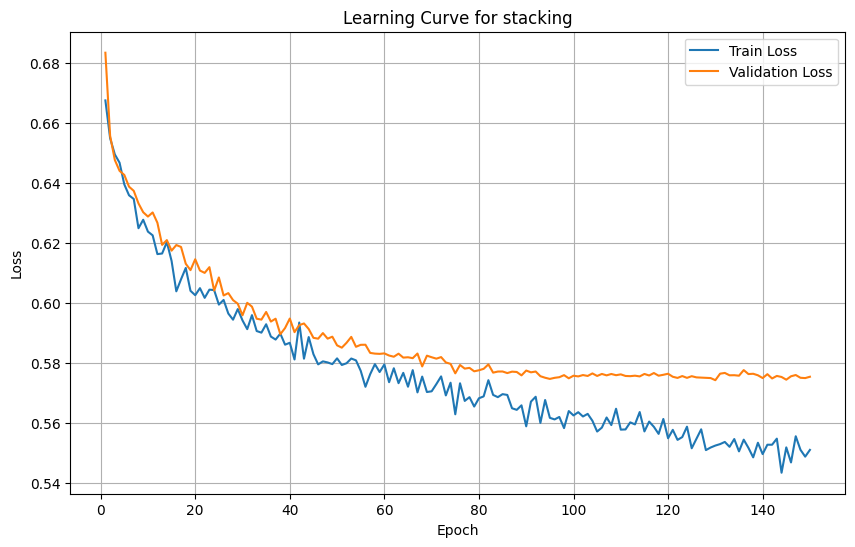

In [68]:
best_params=study.best_params
model = meta_model(input_dim=X_train_tensor.shape[1],
              dropout1=best_params["dropout1"],
              dropout2=best_params["dropout2"],
              dropout3=best_params["dropout3"],
              dropout4=best_params["dropout4"]).to(device)
# 最適化と訓練を実行
optimizer = optim.Adam(model.parameters(), lr=best_params["learning_rate"],weight_decay=best_params["weight_decay"])
criterion = nn.BCELoss()

num_epochs=150
train_losses = []
val_losses = []

model.train()
for epoch in range(num_epochs):
    epoch_train_loss = 0
    epoch_val_loss = 0

    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = model(X_batch).squeeze()
        loss = criterion(outputs, y_batch.squeeze())
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item()
    avg_train_loss = epoch_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_train_loss:.4f}')

    if val_loader is not None:
        model.eval()  
        with torch.no_grad():
            for X_val, y_val in val_loader:
                X_val, y_val = X_val.to(device), y_val.to(device)
                val_outputs = model(X_val).squeeze()
                val_loss = criterion(val_outputs, y_val.squeeze())
                epoch_val_loss += val_loss.item()

        avg_val_loss = epoch_val_loss / len(val_loader)
        val_losses.append(avg_val_loss)
        model.train()  

    if val_loader is not None:
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")
    else:
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
if val_losses:
    plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve for stacking')
plt.legend()
plt.grid()
plt.show()

Accuracy: 58.54%
Precision: 0.4741
Recall: 0.6755
F1 Score: 0.5572
Matthews Correlation Coefficient: 0.1999
Specificity: 0.5288


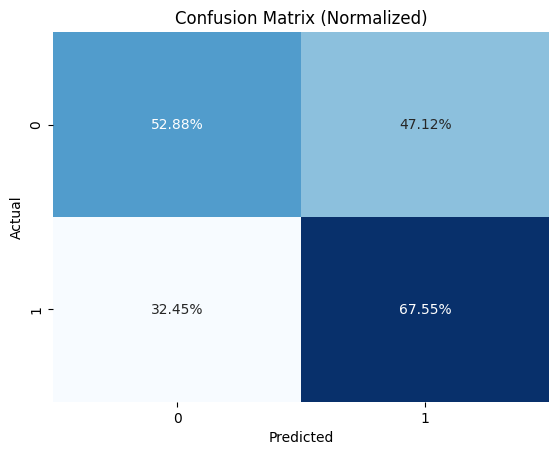

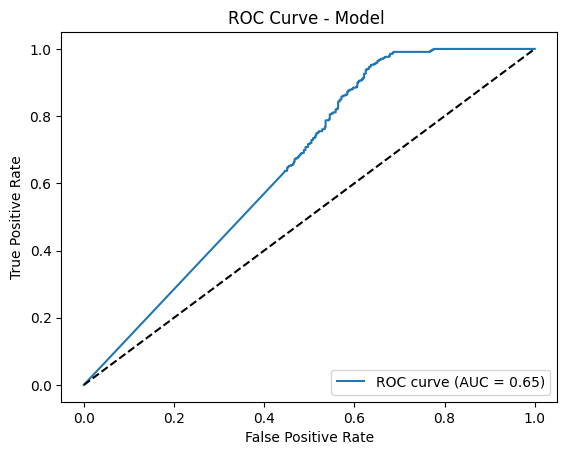

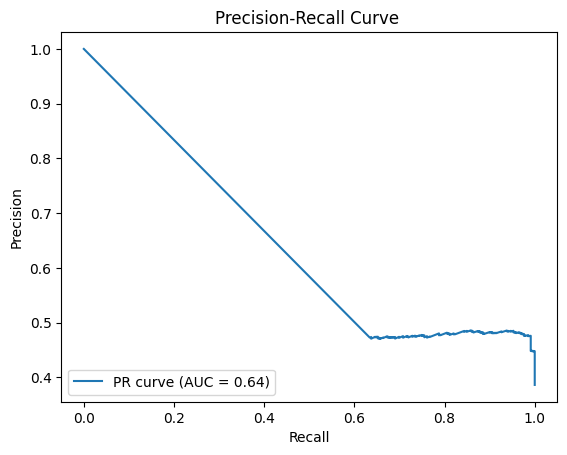

In [69]:
model.eval()
with torch.no_grad():
    X_test_tensor = X_test_tensor.to(device)
    y_test_tensor = y_test_tensor.to(device)

    # 予測と確率
    test_outputs = model(X_test_tensor).squeeze()
    predictions = (test_outputs >=0.5).float()
    y_true = y_test_tensor.cpu().numpy()
    y_pred = predictions.cpu().numpy()
    y_prob = test_outputs.cpu().numpy()

# 評価指標
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    mcc = matthews_corrcoef(y_true, y_pred)
    specificity = recall_score(y_true, y_pred, pos_label=0)  
    print(f'Accuracy: {accuracy * 100:.2f}%')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'Matthews Correlation Coefficient: {mcc:.4f}')
    print(f'Specificity: {specificity:.4f}')

    # 混同行列（割合表示）
    cm = confusion_matrix(y_true, y_pred, normalize='true')
    sns.heatmap(cm, annot=True, fmt=".2%", cmap="Blues", cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix (Normalized)")
    plt.show()

    # ROC曲線とAUC
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - Model ')
    plt.legend(loc="lower right")
    plt.show()

    # Precision-Recall曲線
    precision_curve, recall_curve, pr_thresholds = precision_recall_curve(y_true, y_prob)
    pr_auc = auc(recall_curve, precision_curve)
    plt.plot(recall_curve, precision_curve, label=f'PR curve (AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve ')
    plt.legend(loc="lower left")
    plt.show()    